# Using distributions

`uravu` isn't limited to using normally distributed ordinate values. 
Any distribution of ordinate values can be used, as `uravu` will perform a Gaussian [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) on the samples to determine a description for the distribution. 

This is most easily shown in action, imagine we have some experimental data, that is distributed with a skew normal distribution, rather than the typical normal distribution. 
So the values for a particular $y$-value take the shape, 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from uravu.distribution import Distribution
from uravu.relationship import Relationship
from uravu.utils import straight_line
from uravu import plotting

In [2]:
np.random.seed(2)

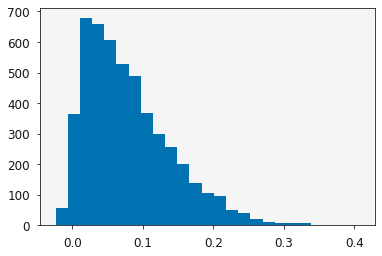

In [3]:
y = skewnorm(10, 0, 0.1)

plt.hist(y.rvs(size=5000), bins=25)
plt.show()

Let's build some synthetic data, collected by sampling some skew normal distribution across a series of values of $x$.

In [4]:
x = np.linspace(1, 100, 10)
Y = []
for i in x:
    Y.append(Distribution(skewnorm.rvs(10, i*3.14, i*0.5, size=5000)+(1*np.random.randn())))

Note that the sample, in this case a load of random values from the distribution, are passed to the `uravu.distribution.Distribution` object and stored as a list of `Distribution` objects. 

This `list` is passed to the `Relationship` class as shown below,

In [5]:
r = Relationship(straight_line, x, Y, bounds=((-10, 10), (-10, 10)))
r.max_likelihood('diff_evo')
r.variable_medians

array([ 3.37733187, -0.02284246])

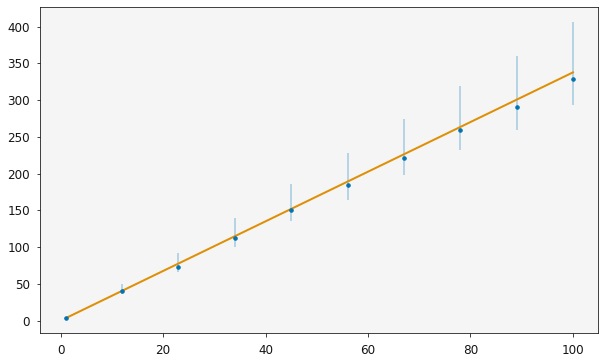

In [6]:
plotting.plot_relationship(r)
plt.show()

It is then possible to use the standard sampling methods to investigate the distribution of the model parameters, here the model is a simple straight line relationship.

In [7]:
r.mcmc()

100%|██████████| 1000/1000 [01:04<00:00, 15.45it/s]


Above [Markov chain Monte Carlo](./mcmc.html) is used to sample the distribution of the gradient and intercept of the straight line, given the uncertainties in the ordinate values (from the distributions).

These distributions can be visualised with the `plot_distribution` from the `uravu.plotting` library. 

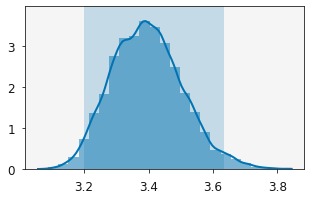

In [8]:
plotting.plot_distribution(r.variables[0])
plt.show()

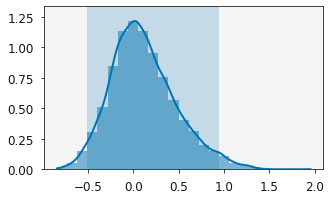

In [9]:
plotting.plot_distribution(r.variables[1])
plt.show()

We can also see how these distributions affect the agreement with the data by plotting the relationship.

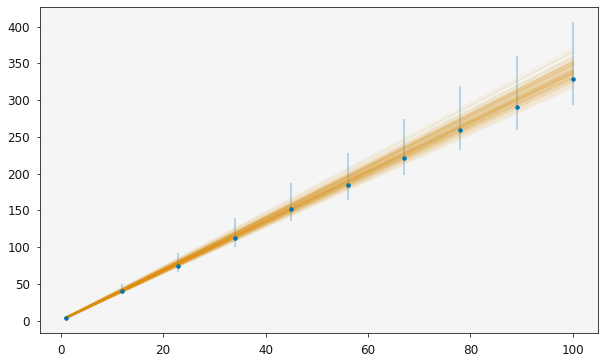

In [10]:
plotting.plot_relationship(r)
plt.show()